# ANN

In [1]:
#digit recognition using ANN
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#loding the mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("training set size:",x_train.shape,y_train.shape)
print("test set size:",x_test.shape,y_test.shape)


training set size: (60000, 28, 28) (60000,)
test set size: (10000, 28, 28) (10000,)


In [3]:
#number of classes
num_labels=len(np.unique(y_train))
num_labels

10

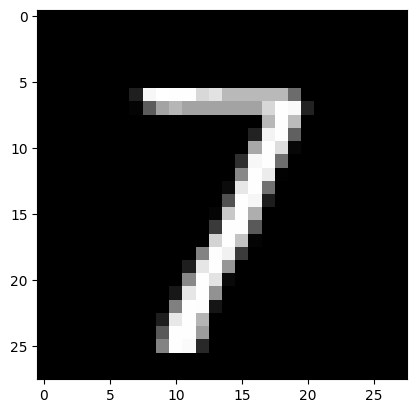

In [4]:
#showung exapmle from the data set
plt.figure(figure=(5,5))
plt.imshow(x_train[560],cmap="gray")

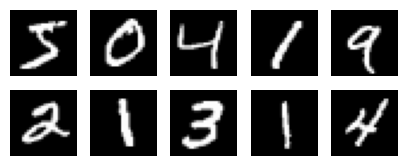

In [5]:
plt.figure(figsize=(5,5))
for i in range(0,10):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.axis("off")

In [6]:
def visualize_img(data,num=10):
    plt.figure(figsize=(5,5))
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(data[i],cmap="gray")
        plt.axis("off")

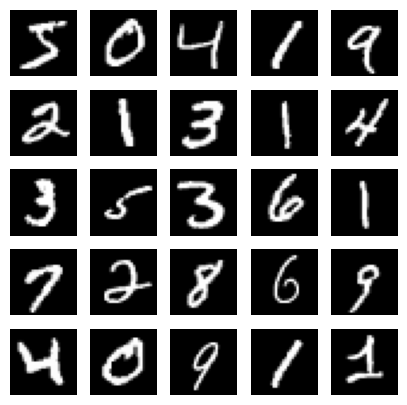

In [7]:
visualize_img(x_train,25)

In [8]:
def pixel_visualize(img):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")
    width,height=img.shape

    threshold=img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2 )),xy=(y,x),color="white"if img[x][y]<threshold else"black")
        

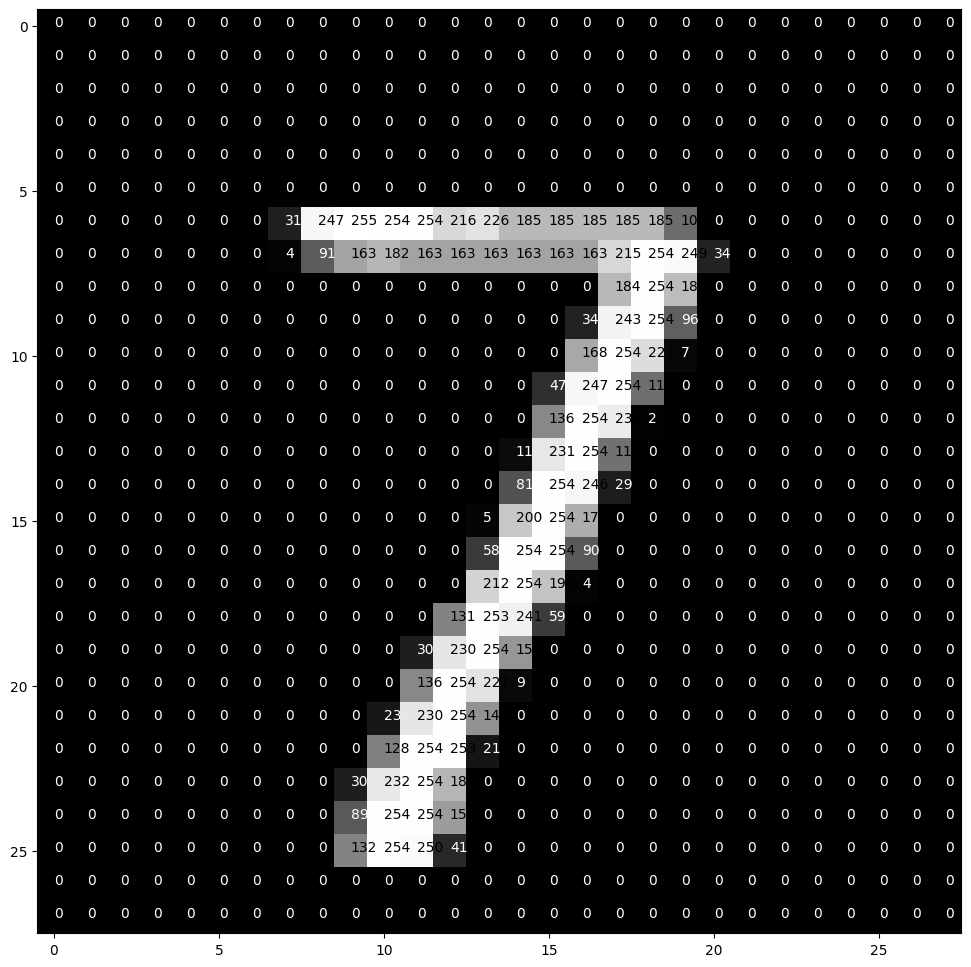

In [9]:
pixel_visualize(x_train[560])

# Data preparation


In [10]:
# encoding for dependent variable

In [11]:
#before encoding
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# reshaping

In [14]:
image_size=x_train.shape[1]
image_size

28

In [15]:
print(f"x_train size:{x_train.shape}\n\nx_test size{x_test.shape}")

x_train size:(60000, 28, 28)

x_test size(10000, 28, 28)


In [16]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)


In [17]:
print(f"x_train size:{x_train.shape}\n\nx_test size{x_test.shape}")

x_train size:(60000, 28, 28, 1)

x_test size(10000, 28, 28, 1)


In [18]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [19]:
print(x_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

# modeling

In [20]:
model=tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation="relu",name="layer1"),
    Dense(units=num_labels,activation="softmax",name="output_layer")])
model.compile(loss="categorical_crossentropy",
           optimizer="adam",
           metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#model fit

model.fit(x_train,y_train,epochs=8,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8271 - loss: 0.6305 - precision: 0.9267 - recall: 0.6957 - val_accuracy: 0.9446 - val_loss: 0.1927 - val_precision: 0.9585 - val_recall: 0.9327
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9485 - loss: 0.1803 - precision: 0.9610 - recall: 0.9373 - val_accuracy: 0.9596 - val_loss: 0.1379 - val_precision: 0.9680 - val_recall: 0.9519
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9649 - loss: 0.1237 - precision: 0.9730 - recall: 0.9566 - val_accuracy: 0.9680 - val_loss: 0.1097 - val_precision: 0.9734 - val_recall: 0.9621
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9741 - loss: 0.0931 - precision: 0.9794 - recall: 0.9695 - val_accuracy: 0.9713 - val_loss: 0.0956 - val_precision: 0.9767 - val_recall: 0.9665
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9783 - loss: 0.0757 - precision: 0.9832 - recall: 0.9742 - val_accuracy: 0.9734 - val_loss: 0.0860 

# model evaluation

In [23]:
history=model.fit(x_train,y_train,epochs=8,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9903 - loss: 0.0351 - precision: 0.9919 - recall: 0.9886 - val_accuracy: 0.9779 - val_loss: 0.0749 - val_precision: 0.9802 - val_recall: 0.9761
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9925 - loss: 0.0301 - precision: 0.9937 - recall: 0.9910 - val_accuracy: 0.9773 - val_loss: 0.0749 - val_precision: 0.9793 - val_recall: 0.9756
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9934 - loss: 0.0252 - precision: 0.9944 - recall: 0.9923 - val_accuracy: 0.9761 - val_loss: 0.0766 - val_precision: 0.9782 - val_recall: 0.9746
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9946 - loss: 0.0216 - precision: 0.9957 - recall: 0.9937 - val_accuracy: 0.9779 - val_loss: 0.0736 - val_precision: 0.9793 - val_recall: 0.9768
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9959 - loss: 0.0179 - precision: 0.9968 - recall: 0.9951 - val_accuracy: 0.9797 - val_loss: 0.0726 

Text(0.5, 1.0, 'Training and Test loss Graph')

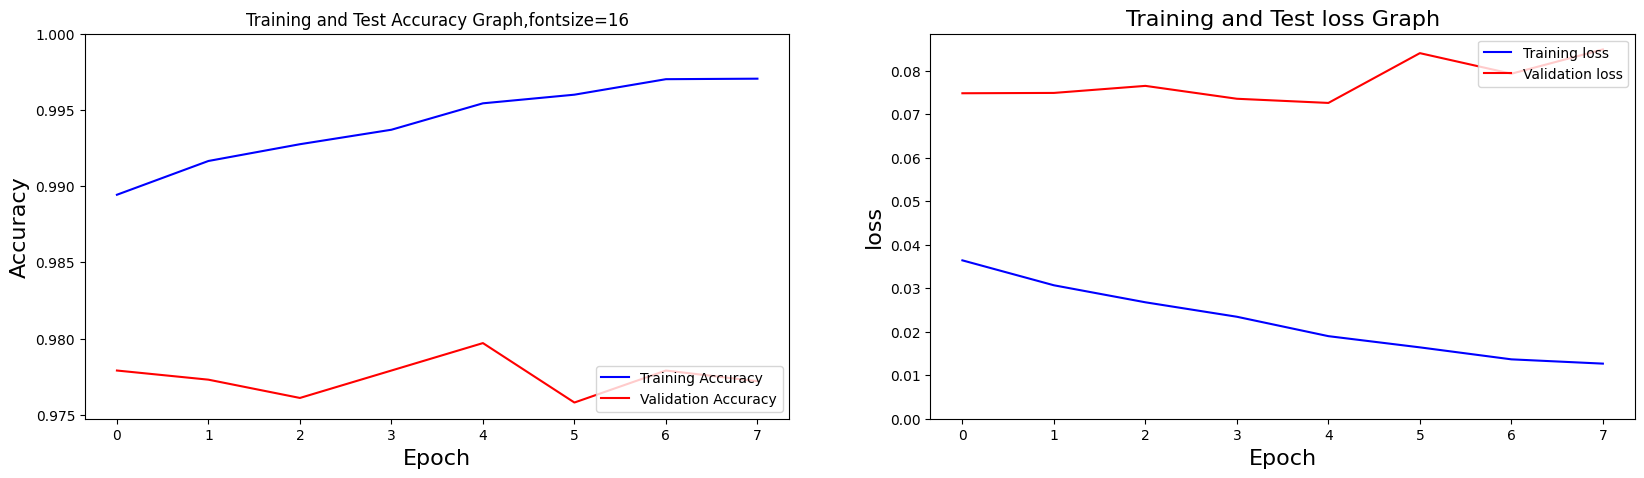

In [24]:
#accuracy and loss charts
#Accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],color="b",label="Training Accuracy")
plt.plot(history.history["val_accuracy"],color="r",label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Training and Test Accuracy Graph,fontsize=16")
#loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color="b",label="Training loss")
plt.plot(history.history["val_loss"],color="r",label="Validation loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Test loss Graph",fontsize=16)


In [25]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print(f" test accuracy:{round(acc*100,2)}")
print(f" test loss:{round(loss*100,2)}")
print(f" test precision:{round(precision*100,2)}")
print(f" test recall:{round(recall*100,2)}")

 test accuracy:97.72
 test loss:8.49
 test precision:97.9
 test recall:97.63


# prediction  and visualization

In [26]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [28]:
if len(y_test.shape)>1 and y_test.shape[1]!=1:
    y_test=np.argmax(y_test,axis=1)

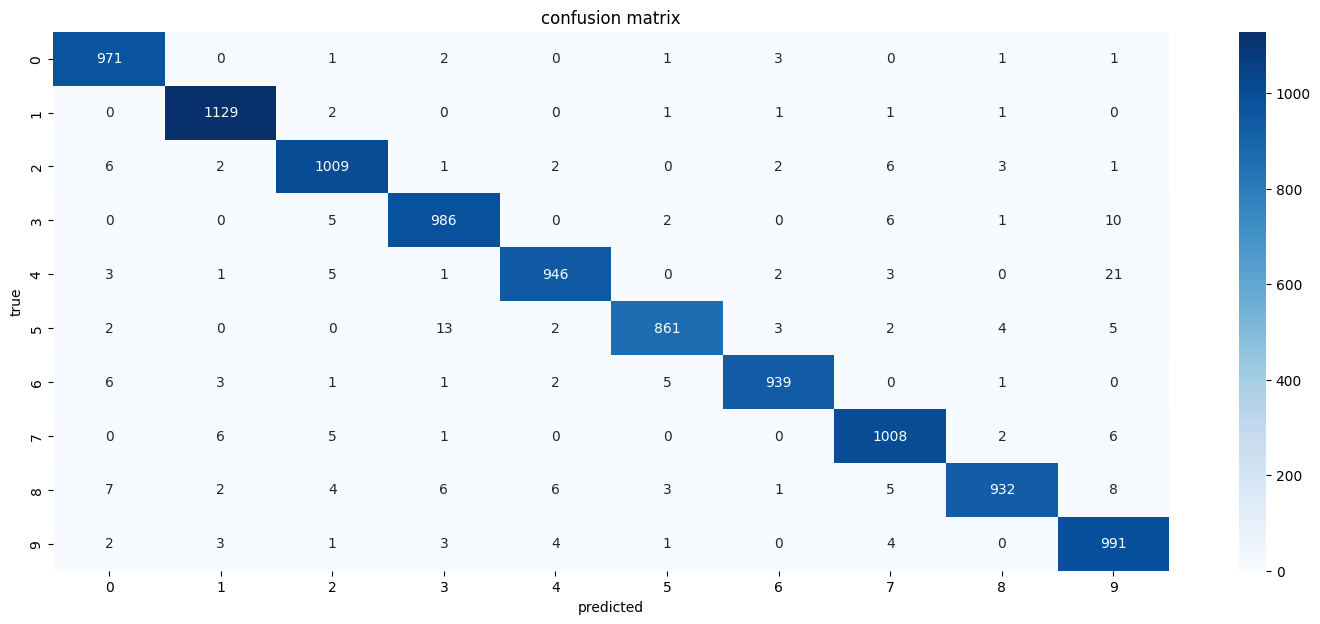

In [31]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred_classes)
plt.figure(figsize=(18,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix')
plt.show()

In [32]:
model.save("mnist_model.h5")

In [36]:
import random
random=random.randint(0,x_test.shape[0])
print(y_test[random])
test_image=x_test[random]
print(y_test[random])


6
6


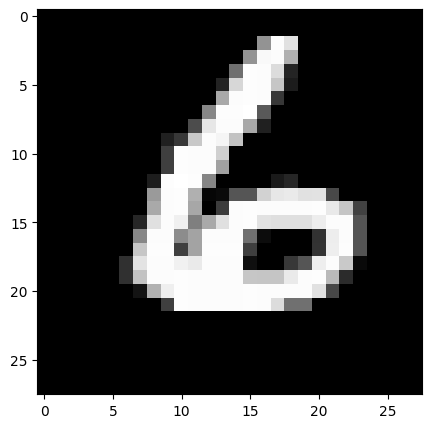

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28,28),cmap="gray")

In [41]:
test_data=x_test[random].reshape(1,28,28,1)


In [42]:
probability=model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [43]:
predicted_classes=np.argmax(probability)

In [47]:
print(f"Predicted Classes:{predicted_classes}\nprobability value of predicted class:{np.max(probability,axis=-1)[0]}\nprobability value of predicted classes:{probability}")

Predicted Classes:6
probability value of predicted class:1.0
probability value of predicted classes:[[3.8219335e-13 1.5956054e-14 3.1387816e-12 1.7334917e-13 1.3656519e-12
  2.9549817e-11 1.0000000e+00 3.5229119e-17 1.3479053e-11 5.0509100e-14]]
